In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import random as rd
import matplotlib.pyplot as plt

In [2]:
train=pd.read_excel("train_go05W65.xlsx")

In [3]:
train.head()
train.tail()

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1,Product_Holding_B2
37743,CC314217,Male,28,24,1,C1,S2,['P16'],['P9']
37744,CC388747,Male,36,11,0,C2,S2,"['P16', 'P17', 'P21']","['P5', 'P12']"
37745,CC318056,Male,44,26,1,C2,S2,['P14'],['P13']
37746,CC373551,Female,56,15,1,C1,S2,"['P12', 'P13']",['P1']
37747,CC269624,Male,29,13,0,C2,S2,"['P16', 'P17']","['P8', 'P12']"


In [4]:
train=train.drop(["Customer_ID"],axis=1)

In [5]:
def clean_alt_list(list_):
    list_ = list_.replace(', ', ',')
    list_ = list_.replace('[', '')
    list_ = list_.replace(']', '')
    list_ = list_.replace("'", "")
    return list_

In [6]:

X=train["Product_Holding_B1"].apply(clean_alt_list)
X

0                P16
1            P13,P20
2                P11
3             P8,P13
4        P16,P17,P21
            ...     
37743            P16
37744    P16,P17,P21
37745            P14
37746        P12,P13
37747        P16,P17
Name: Product_Holding_B1, Length: 37748, dtype: object

In [7]:
train['Product_Holding_B1'].iloc[641]

"['P12', 'P13', 'P17', 'P19', 'P20', 'P21']"

In [8]:
y =train["Product_Holding_B2"].apply(clean_alt_list)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
train=pd.read_excel("train_go05W65.xlsx")
train=train.drop(["Customer_ID"],axis=1)
train

,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1,Product_Holding_B2
0,Male,41,14,0,C1,S3,['P16'],['P8']
1,Female,47,14,1,C1,S2,"['P13', 'P20']",['P3']
2,Female,59,14,0,C2,S2,['P11'],['P00']
3,Female,32,16,0,C1,S2,"['P8', 'P13']",['P6']
4,Male,30,15,0,C2,S3,"['P16', 'P17', 'P21']","['P8', 'P12']"
...,...,...,...,...,...,...,...,...
37743,Male,28,24,1,C1,S2,['P16'],['P9']
37744,Male,36,11,0,C2,S2,"['P16', 'P17', 'P21']","['P5', 'P12']"
37745,Male,44,26,1,C2,S2,['P14'],['P13']
37746,Female,56,15,1,C1,S2,"['P12', 'P13']",['P1']


In [11]:
train2 = train.copy()
y2 = pd.DataFrame(y,columns = ['Product_Holding_B2'])

products = ['P00','P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20','P21']

for prd in products :
  train2[prd] = X.str.contains(prd).astype('int')
  y2[prd] = y.str.contains(prd).astype('int')

train2

,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1,Product_Holding_B2,P00,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21
0,Male,41,14,0,C1,S3,['P16'],['P8'],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Female,47,14,1,C1,S2,"['P13', 'P20']",['P3'],0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,Female,59,14,0,C2,S2,['P11'],['P00'],0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Female,32,16,0,C1,S2,"['P8', 'P13']",['P6'],0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Male,30,15,0,C2,S3,"['P16', 'P17', 'P21']","['P8', 'P12']",0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37743,Male,28,24,1,C1,S2,['P16'],['P9'],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
37744,Male,36,11,0,C2,S2,"['P16', 'P17', 'P21']","['P5', 'P12']",0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
37745,Male,44,26,1,C2,S2,['P14'],['P13'],0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
37746,Female,56,15,1,C1,S2,"['P12', 'P13']",['P1'],0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0


In [12]:
y2

,Product_Holding_B2,P00,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21
0,P8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,P3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,P00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,P6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"P8,P12",0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37743,P9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
37744,"P5,P12",0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
37745,P13,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
37746,P1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
train2.drop(['Product_Holding_B1','Product_Holding_B2'],inplace = True,axis = 1)
train2

,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,P00,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21
0,Male,41,14,0,C1,S3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Female,47,14,1,C1,S2,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,Female,59,14,0,C2,S2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Female,32,16,0,C1,S2,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Male,30,15,0,C2,S3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37743,Male,28,24,1,C1,S2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
37744,Male,36,11,0,C2,S2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
37745,Male,44,26,1,C2,S2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
37746,Female,56,15,1,C1,S2,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0


In [14]:
y2.drop(['Product_Holding_B2'],axis = 1 ,inplace = True)

Converting simple categorical variables

In [15]:
train2[['Customer_Category_S2','Customer_Category_S3']] = pd.get_dummies(train2['Customer_Category'], drop_first= True)

train2[['IsMale']] = pd.get_dummies(train2['Gender'], drop_first= True)

In [16]:
train2[['City_Category_2']] = pd.get_dummies(train2['City_Category'], drop_first= True)
train

,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1,Product_Holding_B2
0,Male,41,14,0,C1,S3,['P16'],['P8']
1,Female,47,14,1,C1,S2,"['P13', 'P20']",['P3']
2,Female,59,14,0,C2,S2,['P11'],['P00']
3,Female,32,16,0,C1,S2,"['P8', 'P13']",['P6']
4,Male,30,15,0,C2,S3,"['P16', 'P17', 'P21']","['P8', 'P12']"
...,...,...,...,...,...,...,...,...
37743,Male,28,24,1,C1,S2,['P16'],['P9']
37744,Male,36,11,0,C2,S2,"['P16', 'P17', 'P21']","['P5', 'P12']"
37745,Male,44,26,1,C2,S2,['P14'],['P13']
37746,Female,56,15,1,C1,S2,"['P12', 'P13']",['P1']


In [17]:
train2.drop(['City_Category','Customer_Category','Gender'],inplace = True,axis = 1)
train2

,Age,Vintage,Is_Active,P00,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,Customer_Category_S2,Customer_Category_S3,IsMale,City_Category_2
0,41,14,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
1,47,14,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
2,59,14,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,32,16,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,30,15,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37743,28,24,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
37744,36,11,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,1
37745,44,26,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1
37746,56,15,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0


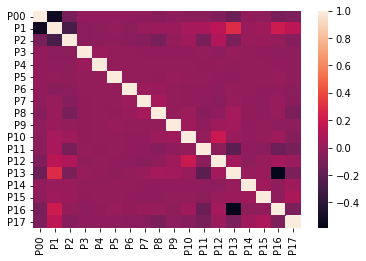

In [18]:
import seaborn as sns

sns.heatmap(train2[['P00',	'P1',	'P2',	'P3',	'P4',	'P5'	,'P6',	'P7'	,'P8'	,'P9'	,'P10'	,'P11'	,'P12'	,'P13'	,'P14'	,'P15'	,'P16'	,'P17']].corr())

In [19]:
train2

,Age,Vintage,Is_Active,P00,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,Customer_Category_S2,Customer_Category_S3,IsMale,City_Category_2
0,41,14,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
1,47,14,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
2,59,14,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,32,16,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,30,15,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37743,28,24,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
37744,36,11,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,1
37745,44,26,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1
37746,56,15,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0


In [20]:
y2

,P00,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37743,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
37744,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
37745,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
37746,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Building the Model


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [22]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_names = [ 'Age', 'Vintage']
features = train2[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
train2[col_names]= pd.DataFrame(features, columns = col_names)
train2

,Age,Vintage,Is_Active,P00,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,Customer_Category_S2,Customer_Category_S3,IsMale,City_Category_2
0,0.244882,-0.543603,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
1,0.837670,-0.543603,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
2,2.023244,-0.543603,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,-0.644298,-0.348524,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,-0.841894,-0.446064,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37743,-1.039490,0.431790,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
37744,-0.249107,-0.836221,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,1
37745,0.541276,0.626868,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1
37746,1.726850,-0.446064,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0


In [23]:
# X_train, X_test, y_train, y_test = train_test_split(train2, y2, test_size=0.33, random_state=42)

X_train = train2.copy()
X_test = train2.copy()
y_train = y2.copy()
y_test = y2.copy()

Deep Learning

In [24]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [25]:
y2.to_numpy()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [26]:
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu',input_shape = (29,)) 
])
model.add(keras.layers.Dense(units = 10, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units = 10, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units = 22, activation='sigmoid'))


model.compile(optimizer='adam',
              loss= 'BinaryCrossentropy' ,
              metrics=['accuracy'])

model.fit(X_train, y_train,batch_size = 32, epochs=50)

Epoch 1/50
1180/1180 [==============================] - 3s 2ms/step - loss: 0.2600 - accuracy: 0.3955
Epoch 2/50
1180/1180 [==============================] - 2s 2ms/step - loss: 0.1850 - accuracy: 0.4601
Epoch 3/50
1180/1180 [==============================] - 2s 2ms/step - loss: 0.1683 - accuracy: 0.4817
Epoch 4/50
1180/1180 [==============================] - 2s 2ms/step - loss: 0.1617 - accuracy: 0.4943
Epoch 5/50
1180/1180 [==============================] - 2s 2ms/step - loss: 0.1577 - accuracy: 0.5095
Epoch 6/50
1180/1180 [==============================] - 2s 2ms/step - loss: 0.1552 - accuracy: 0.5119
Epoch 7/50
1180/1180 [==============================] - 2s 2ms/step - loss: 0.1540 - accuracy: 0.5063
Epoch 8/50
1180/1180 [==============================] - 2s 2ms/step - loss: 0.1526 - accuracy: 0.5053
Epoch 9/50
1180/1180 [==============================] - 2s 2ms/step - loss: 0.1513 - accuracy: 0.5039
Epoch 10/50
1180/1180 [==============================] - 2s 2ms/step - loss: 0.150

In [27]:
model.evaluate(X_test,y_test,verbose=0)

[0.13246555626392365, 0.5567447543144226]

In [28]:
X_test.iloc[5].shape

(29,)

In [29]:
pred = model.predict(X_test)
df = pd.DataFrame(pred)

In [30]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.016599,0.264349,3.504847e-05,0.057103,0.067690,0.025407,0.128947,0.040849,0.434147,0.061772,0.079527,1.373036e-30,9.179625e-02,4.061298e-26,3.867678e-06,1.072764e-03,3.333805e-20,0.000000e+00,1.276364e-36,2.165840e-22,0.000000e+00,1.322982e-23
1,0.003931,0.697135,4.575551e-04,0.058117,0.049088,0.023419,0.069612,0.033845,0.410302,0.068676,0.086310,1.200420e-10,5.608472e-01,2.316180e-09,1.555592e-03,2.844363e-03,3.757775e-09,1.768945e-14,3.035467e-14,1.451980e-12,2.073360e-17,4.584038e-13
2,0.805925,0.026583,4.365263e-15,0.008571,0.004219,0.001150,0.014929,0.000708,0.045417,0.009632,0.001313,0.000000e+00,8.763075e-04,0.000000e+00,3.307653e-16,2.865120e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000002,0.101366,1.815742e-02,0.148865,0.119405,0.019116,0.586262,0.288818,0.004854,0.001677,0.000149,5.022308e-19,2.935895e-09,0.000000e+00,3.300621e-23,3.754198e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000037,0.827055,7.088184e-04,0.073554,0.087329,0.039324,0.092506,0.054543,0.497171,0.096857,0.127882,2.218938e-05,6.853305e-01,4.179102e-10,2.447098e-03,3.752738e-03,4.666114e-12,1.213639e-14,5.485385e-15,2.660655e-12,1.952317e-17,8.871731e-13


In [31]:
y_test

,P00,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37743,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
37744,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
37745,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
37746,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
def recom(z,index):
    final=[]
    thresh=0.2

    for i in range(0,len(z)):
        if z[i] >thresh:
            final.append('P'+str(index[i]))
    return final

            

In [33]:
y_predict = []
def combine(a):
  
  index = (-a).argsort()[:3]

  index = np.sort(index)

  z = a[index].tolist()

  
  return recom(z,index)

  
for i in pred :
    y_predict.append(combine(i))

  

In [34]:
y_predict[:5]

[['P1', 'P8'], ['P1', 'P8', 'P12'], ['P0'], ['P6', 'P7'], ['P1', 'P8', 'P12']]

In [ ]:
y_test

Test Data

In [ ]:
test = pd.read_csv('test_VkM91FT.csv')

test=test.drop(["Customer_ID"],axis=1)

def clean_alt_list(list_):
    list_ = list_.replace(', ', ',')
    list_ = list_.replace('[', '')
    list_ = list_.replace(']', '')
    list_ = list_.replace("'", "")
    return list_

X=test["Product_Holding_B1"].apply(clean_alt_list)

test2 = test.copy()

products = ['P00','P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20','P21']

for prd in products :
  test2[prd] = X.str.contains(prd).astype('int')


test2.drop(['Product_Holding_B1'],inplace = True,axis = 1)


test2[['Customer_Category_S2','Customer_Category_S3']] = pd.get_dummies(test2['Customer_Category'], drop_first= True)

test2[['IsMale']] = pd.get_dummies(test2['Gender'], drop_first= True)

test2[['City_Category_2']] = pd.get_dummies(test2['City_Category'], drop_first= True)

test2.drop(['City_Category','Customer_Category','Gender'],inplace = True,axis = 1)

test2[col_names]= pd.DataFrame(features, columns = col_names)


test2



In [ ]:
test_pred = model.predict(test2)

y_test_predict = []


for i in test_pred :
    y_test_predict.append(combine(i))

y_test_predict

Extracting Data

In [40]:
y_predict[:10]

[['P1', 'P8'],
 ['P1', 'P8', 'P12'],
 ['P0'],
 ['P6', 'P7'],
 ['P1', 'P8', 'P12'],
 ['P1', 'P16'],
 ['P1', 'P8', 'P12'],
 ['P1', 'P8', 'P12'],
 ['P1', 'P8', 'P12'],
 ['P1', 'P8', 'P12']]

In [43]:
y_predict = np.array(y_predict)
df1 = pd.DataFrame(y_predict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [46]:
df1.to_excel('Train_predictions.xlsx')